# Лабораторная работа №2

## Костырко Е.Ф. М19-ТС

## Вариант №8

In [1]:
import pandas as pd
import numpy as np
ast_df=pd.read_csv('astronauts.csv')
ast_df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


### 1. Определите астронавта из США, который провёл наибольшее количество времени в открытом космосе, постройте график, на котором по оси OX отображены астронавты, а по оси OY – время, которое они провели в открытом космосе.

In [3]:
ast_df[ast_df["Space Walks (hr)"] == ast_df["Space Walks (hr)"].max()]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
203,Michael E. Lopez-Alegria,1992.0,14.0,Retired,5/30/1958,"Madrid, Spain",Male,US Naval Academy; US Naval Postgraduate School,Systems Engineering,Aeronautical Engineering,Captain,US Navy (Retired),3,6190,10,67.0,"STS-73 (Columbia), STS-92 (Discovery), STS-113...",NaN,NaN


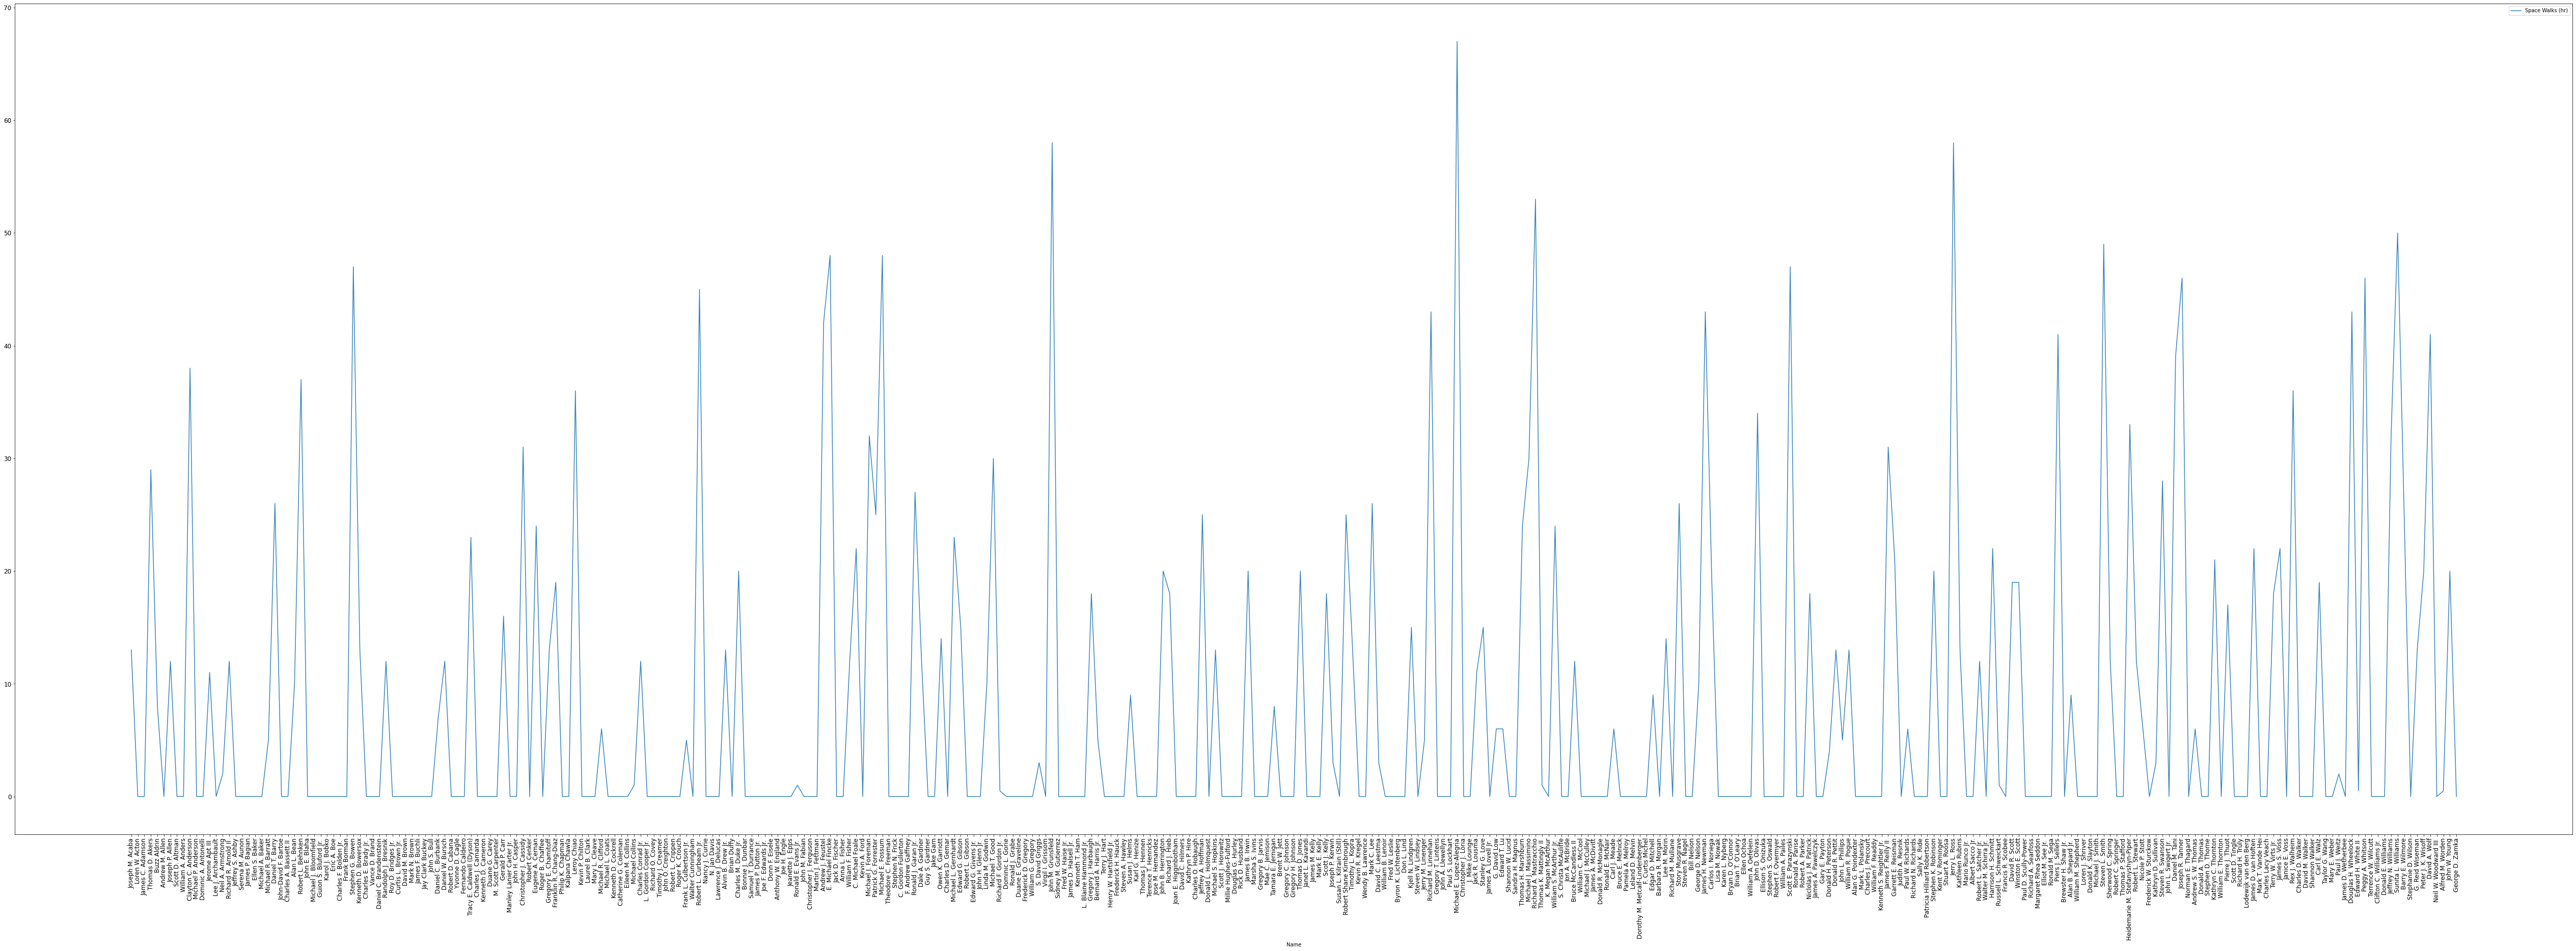

In [13]:
import matplotlib.pyplot as plt
ast_df.plot(alpha=0.9, figsize=(90, 30), legend=True, fontsize=12, x='Name', y='Space Walks (hr)')
plt.xticks(np.arange(len(ast_df)), ast_df['Name'], rotation='vertical')
plt.show()

### 2. Укажите университет, выпустивший наибольшее количество астронавтов, постройте график, на котором по оси OX отображены университеты, а по оси OY – количество астронавтов, которое учились в данном университете.

In [10]:
uni = ast_df["Alma Mater"].describe()
uni

count                  356
unique                 280
top       US Naval Academy
freq                    12
Name: Alma Mater, dtype: object

In [18]:
unic_df =ast_df.groupby(['Alma Mater'])['Name'].count()
unic_df = unic_df.reset_index()
unic_df

,Alma Mater,Name
0,Air Force Institute of Technology,1
1,Amherst College; California Institute of Techn...,1
2,Amherst College; Rice University; Harvard Univ...,1
3,Auburn University,2
4,Auburn University; University of Colorado,1
...,...,...
275,Western Kentucky University,1
276,Whitman College,1
277,Williams College; Georgetown University; Unive...,1
278,Yale University; University of Virginia,1


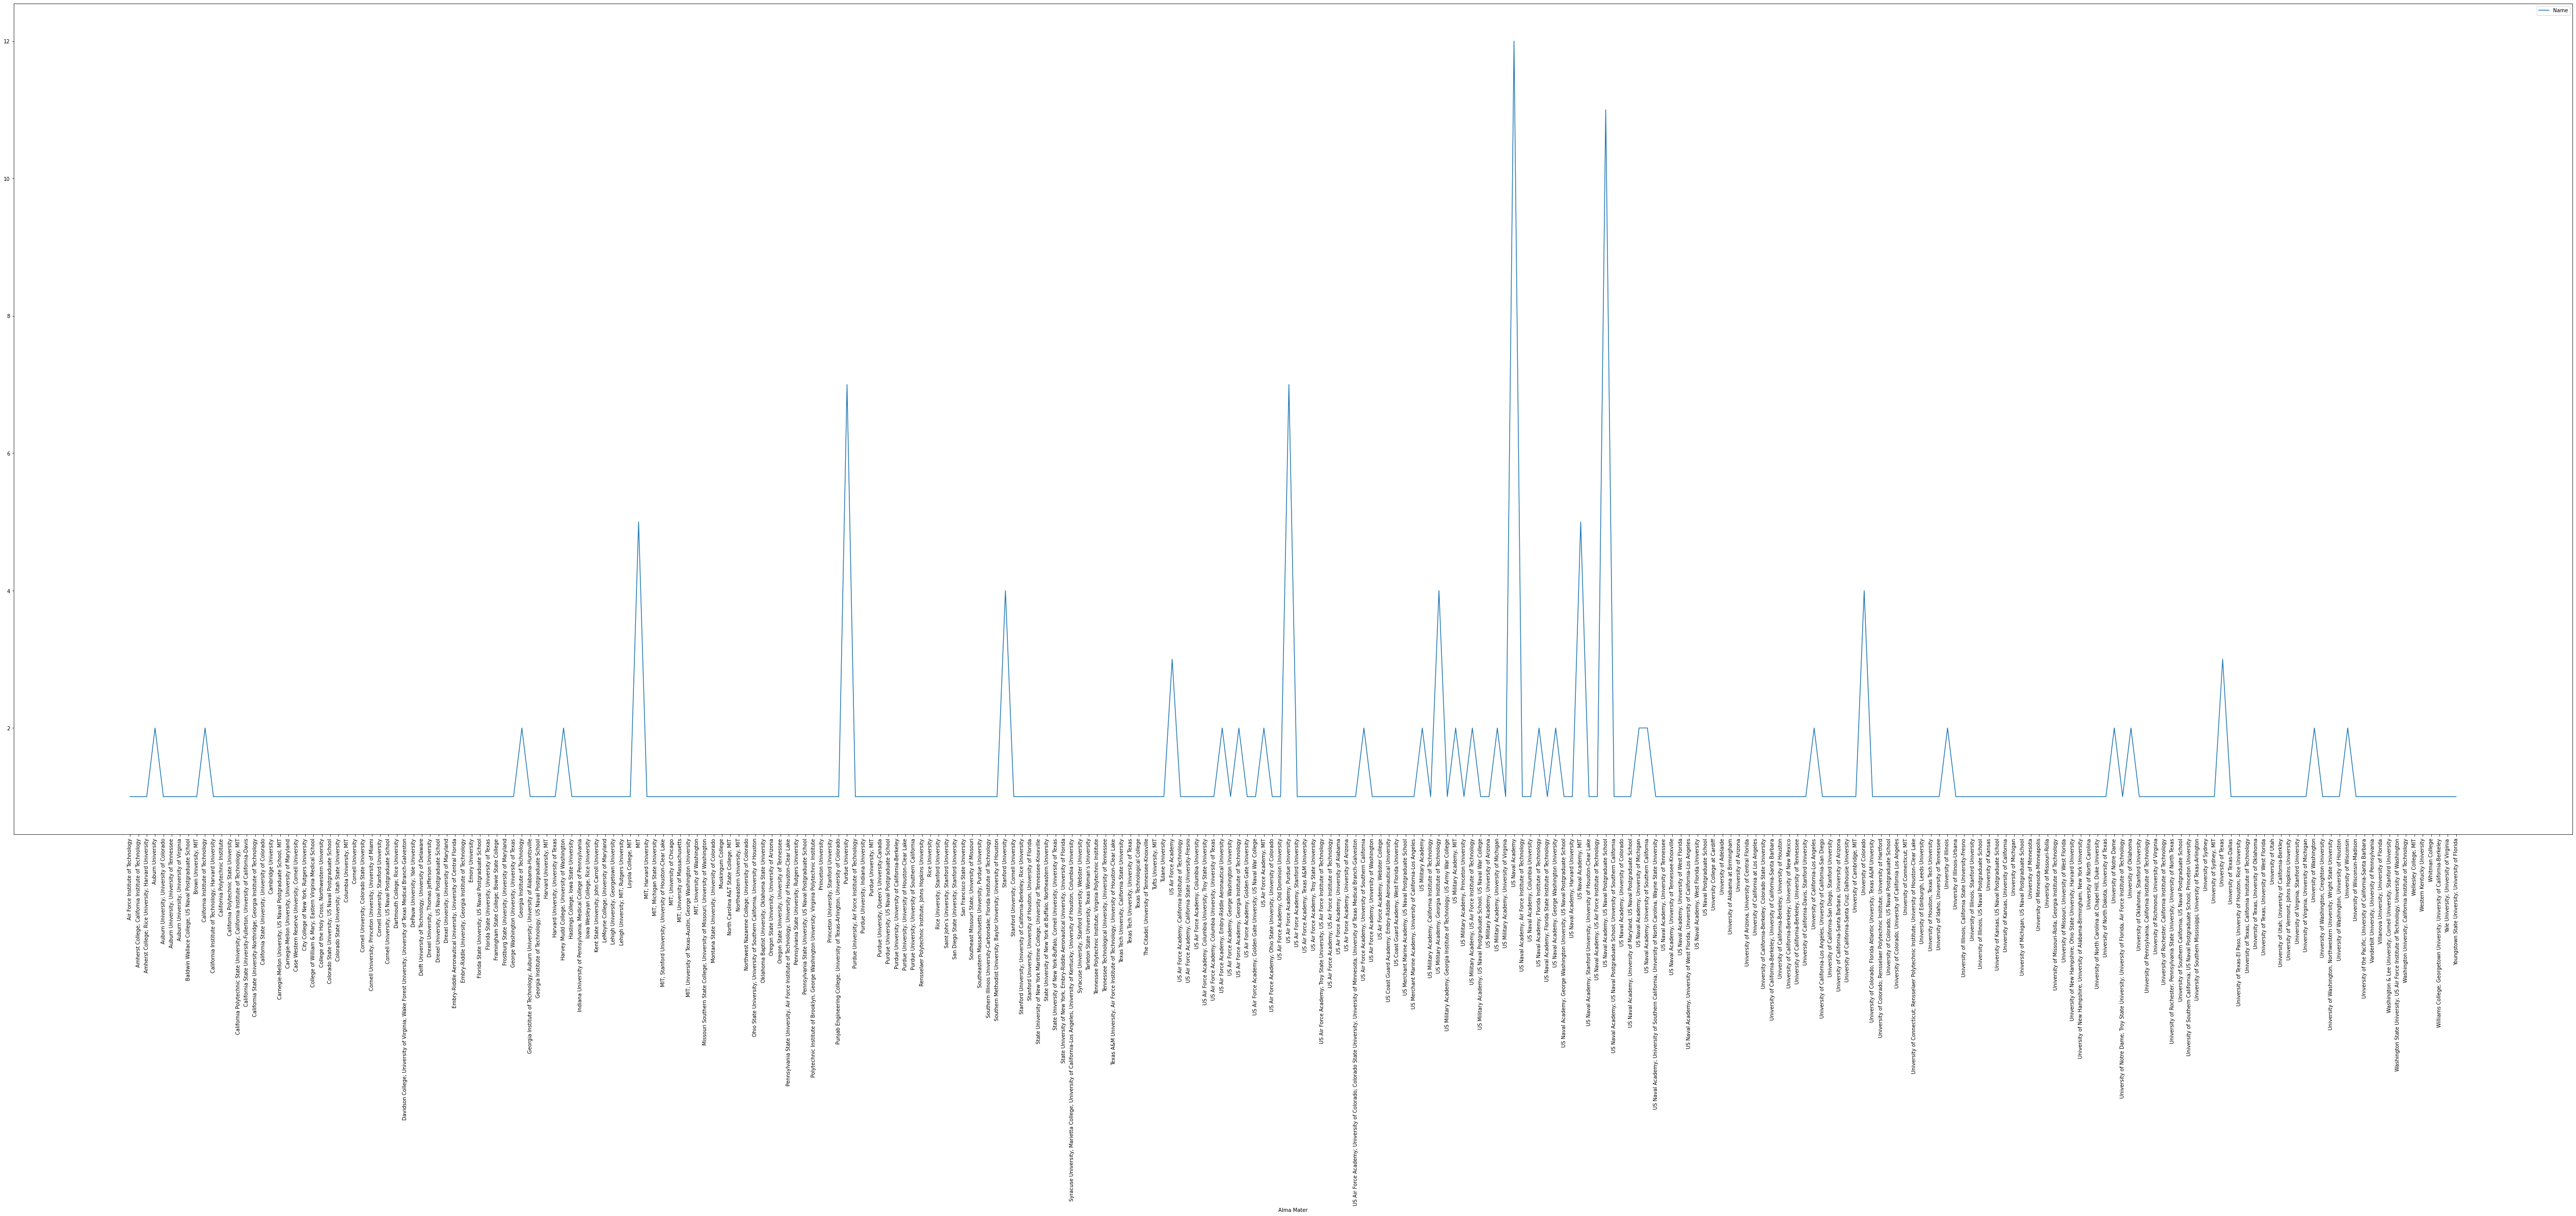

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
unic_df.plot(figsize=(90, 30), x='Alma Mater', y='Name')
plt.xticks(np.arange(len(unic_df)), unic_df['Alma Mater'], rotation='vertical')
plt.show()

### 3. Определите количество военных и гражданских астронавтов.

In [9]:
army = ast_df["Military Rank"].count()
print("Военные")
army

Военные


207

In [10]:
all = ast_df["Name"].count()
no_army = all - army
print("Гражданские")
no_army

Гражданские


150

### 4. Определите наиболее часто встречающееся среди астронавтов военное звание.

In [11]:
rang=ast_df["Military Rank"].value_counts() 
rang.reset_index() 

,index,Military Rank
0,Colonel,94
1,Captain,68
2,Commander,13
3,Lieutenant Colonel,10
4,Major,5
5,Brigadier General,4
6,Major General,4
7,Lieutenant Commander,3
8,Lieutenant General,2
9,Rear Admiral,2


In [12]:
rang.index.values[0] #вывели первое значение

'Colonel'

### 5. Определите количество женщин среди астронавтов

In [13]:
ast_df['Gender'].value_counts()

Male      307
Female     50
Name: Gender, dtype: int64

### 6. Удалите из набора данных астронавтов, для которых не указан бакалавриат. Выведите размер набора данных до и после удаления.

In [14]:
major = ast_df[["Undergraduate Major"]] 
len(major)

357

In [15]:
not_null = ast_df[["Undergraduate Major"]].dropna()
len(not_null)

335

In [16]:
major

,Undergraduate Major
0,Geology
1,Engineering Physics
2,Engineering
3,Applied Mathematics
4,Mechanical Engineering
...,...
352,Electrical Engineering
353,Physics
354,Military Science
355,Aeronautical Engineering


In [17]:
not_null

,Undergraduate Major
0,Geology
1,Engineering Physics
2,Engineering
3,Applied Mathematics
4,Mechanical Engineering
...,...
352,Electrical Engineering
353,Physics
354,Military Science
355,Aeronautical Engineering


### 7. Определите количество астронавтов, родом из Техаса.

In [18]:
ast1 = ast_df[ast_df['Birth Place'].str.contains("TX")]
ast1['Birth Place'].count()

23

### 8. Определите количество миссий, в ходе выполнений которых погибли астронавты.

In [21]:
miss =ast_df.groupby(['Missions'])['Death Mission'].count()
miss=miss.reset_index()
miss

,Missions,Death Mission
0,Apollo 1,1
1,"Apollo 12, Skylab 3",0
2,Apollo 13,0
3,Apollo 13,0
4,Apollo 14,0
...,...,...
300,Skylab 2,0
301,"Skylab 2, STS-6 (Challenger)",0
302,"Skylab 3, STS-3 (Columbia)",0
303,"Skylab 3, STS-9 (Columbia)",0


In [23]:
miss[miss["Death Mission"] >0].count()

Missions         12
Death Mission    12
dtype: int64

### 9. Вычислите корреляцию Пирсона и Спирмена между признаками Gender и Missions. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [2]:
gender_missions=ast_df[["Gender","Missions"]]
gender_missions

,Gender,Missions
0,Male,"STS-119 (Discovery), ISS-31/32 (Soyuz)"
1,Male,STS 51-F (Challenger)
2,Male,"STS-28 (Columbia), STS-43 (Atlantis)"
3,Male,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ..."
4,Male,"Gemini 12, Apollo 11"
...,...,...
352,Male,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...
353,Male,NaN
354,Male,Apollo 15
355,Male,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS..."


In [54]:
x = ast_df[["Gender","Missions"]].apply(lambda x: x.factorize()[0]).corr("pearson")
x

,Gender,Missions
Gender,1.000000,0.079876
Missions,0.079876,1.000000


In [56]:
y = ast_df[["Gender","Missions"]].apply(lambda x: x.factorize()[0]).corr("spearman")
y

,Gender,Missions
Gender,1.000000,0.077704
Missions,0.077704,1.000000


In [6]:
import seaborn as sns

<AxesSubplot:>

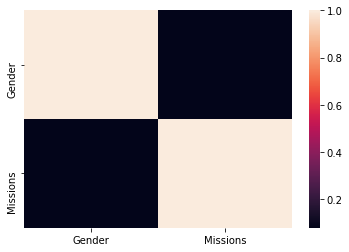

In [55]:
sns.heatmap(x, xticklabels=x.columns.values, yticklabels=x.columns.values)

<AxesSubplot:>

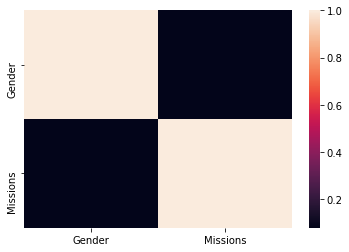

In [57]:
sns.heatmap(y, xticklabels=y.columns.values, yticklabels=y.columns.values)

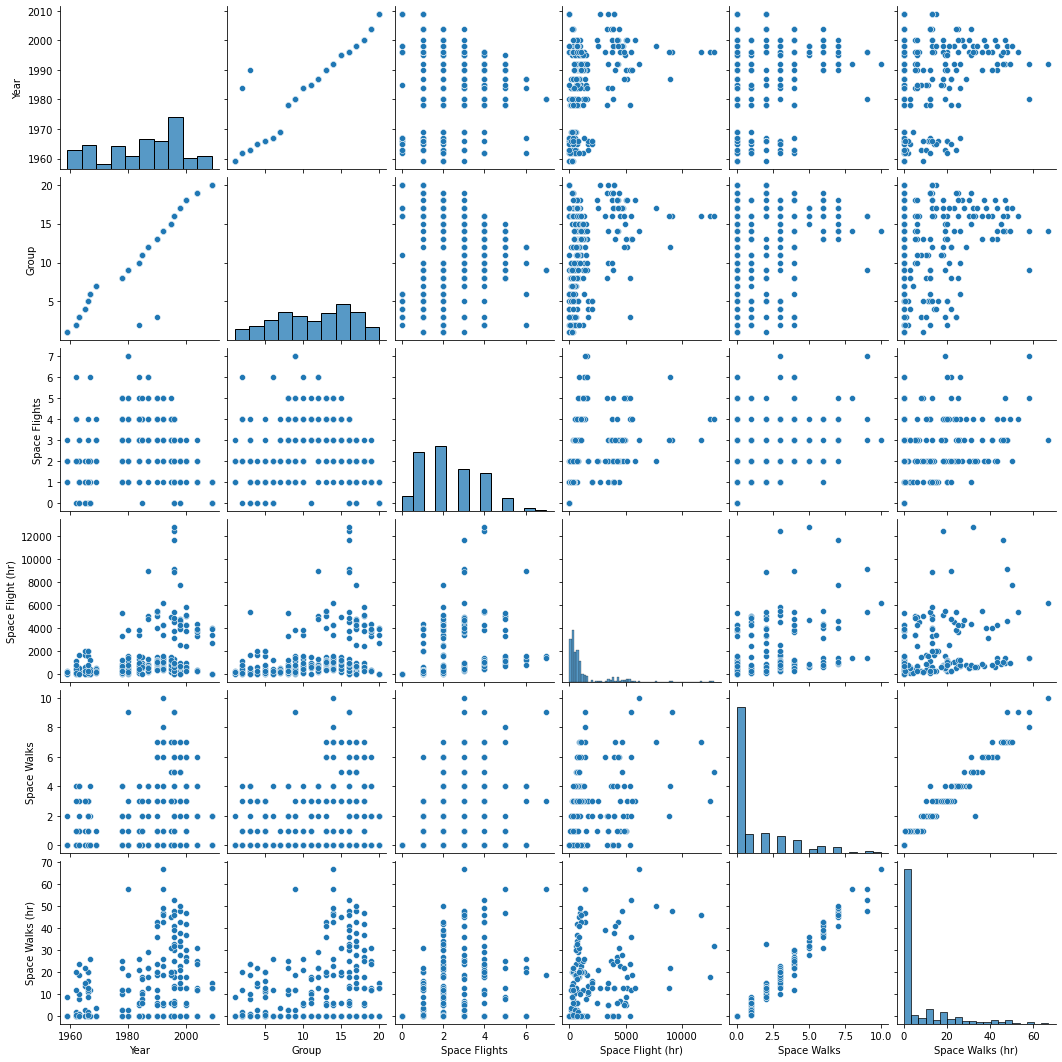

In [88]:
sns.pairplot(ast_df)